In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Perceptron

### 1a) Perceptron Algorithm (linearly separable)

In [82]:
X = np.load('Xlin_sep.npy')
y = np.load('ylin_sep.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

In [83]:
y = np.where(y == 0, -1, 1)
class Perceptron1:
    def __init__(self, input_dim, learning_rate=0.01, max_epochs=100):
        self.weights = np.zeros(input_dim + 1) 
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.history = []  

    def predict(self, X):
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        return np.sign(X_with_bias @ self.weights)

    def fit(self, X, y):
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        for epoch in range(self.max_epochs):
            for i in range(X_with_bias.shape[0]): 
                if y[i] * (X_with_bias[i] @ self.weights) <= 0:
                    self.weights += self.learning_rate * y[i] * X_with_bias[i]
            self.history.append(self.weights.copy())
            if np.all(y == self.predict(X)):
                break

input_dim = X_train.shape[1]
perceptron1 = Perceptron1(input_dim=input_dim)
perceptron1.fit(X_train, y_train)

train_accuracy = np.mean(perceptron1.predict(X_train) == y_train)
test_accuracy = np.mean(perceptron1.predict(X_test) == y_test)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 100.00%


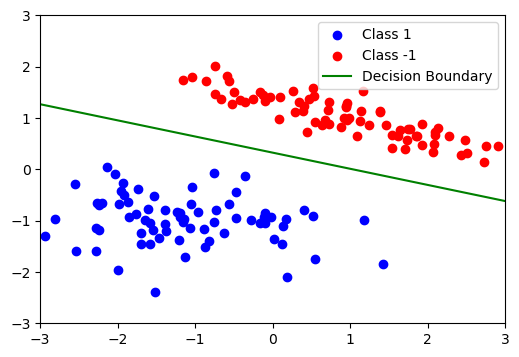

In [70]:
def plot_decision_boundary(weights, X, y, ax):
    ax.clear()
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

    x_min, x_max = ax.get_xlim()
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(weights[0] * x_vals + weights[2]) / weights[1]  
    ax.plot(x_vals, y_vals, color='green', label='Decision Boundary')

    ax.legend()
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

fig, ax = plt.subplots(figsize=(6, 4))
plot_decision_boundary(perceptron1.history[-1], X_train, y_train, ax)  
plt.show()

In [15]:
 # def fit(self, X, y):
 #        n_samples, n_features = X.shape

 #        self.weights = np.zeros(n_features)
 #        self.bias = 0

 #        for _ in range(self.n_iter):
 #            for idx, x_i in enumerate(X):
 #                linear_output = np.dot(x_i, self.weights) + self.bias
 #                y_predicted = self._activation_function(linear_output)

 #                update = self.learning_rate * (y[idx] - y_predicted)
 #                self.weights += update * x_i
 #                self.bias += update

### 1b) Perceptron Algorithm (Non-linearly separable)

In [84]:
X1 = np.load('Xlinnoise_sep.npy')
y1 = np.load('ylinnoise_sep.npy')
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=50, random_state=42)

In [85]:
class Perceptron2:
    def __init__(self, input_dim, learning_rate=0.01, max_epochs=300):
        self.weights = np.zeros(input_dim + 1)  
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.history = []

    def predict(self, X):
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        return np.sign(X_with_bias @ self.weights)

    def fit(self, X, y):
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        for epoch in range(self.max_epochs):
            for i in range(X_with_bias.shape[0]):
                if y[i] * (X_with_bias[i] @ self.weights) <= 0:
                    self.weights += self.learning_rate * y[i] * X_with_bias[i]
            self.history.append(self.weights.copy())

    def score(self, X, y):
        y_pred = self.predict(X)
        return (np.mean(y_pred == y))*100


perceptron2 = Perceptron2(input_dim=2, learning_rate=0.01, max_epochs=100)
perceptron2.fit(X_train, y_train)

train_acc = perceptron2.score(X_train, y_train)
test_acc = perceptron2.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")


Train Accuracy: 78.00%
Test Accuracy: 68.00%


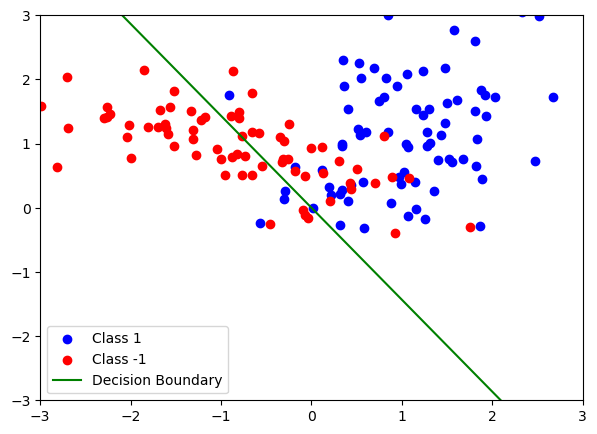

In [18]:
def plot_decision_boundary(weights, X, y, ax):
    ax.clear()
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

    # Decision boundary
    x_min, x_max = ax.get_xlim()
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(weights[0] * x_vals + weights[2]) / weights[1]
    ax.plot(x_vals, y_vals, color='green', label='Decision Boundary')

    ax.legend()
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

fig, ax = plt.subplots(figsize=(7, 5))
plot_decision_boundary(perceptron2.history[-1], X_train, y_train, ax)
plt.show()

### 1c) Polynomial Feature Expansion

In [77]:
X = np.load('circles_x.npy')
y = np.load('circles_y.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
poly = PolynomialFeatures(degree=2, include_bias=False) # polynomial feature expansion
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [62]:
class Perceptron3:  #Using the Peceptron class (non-linear) from the previous question
    def __init__(self, input_dim, learning_rate=0.01, max_epochs=100):
        self.weights = np.zeros(input_dim + 1)  
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.history = []

    def predict(self, X):
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        return np.sign(X_with_bias @ self.weights)

    def fit(self, X, y):
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        for epoch in range(self.max_epochs):
            for i in range(X_with_bias.shape[0]):
                if y[i] * (X_with_bias[i] @ self.weights) <= 0:
                    self.weights += self.learning_rate * y[i] * X_with_bias[i]
            self.history.append(self.weights.copy())

    def score(self, X, y):
        y_pred = self.predict(X)
        return (np.mean(y_pred == y)) * 100

perceptron3 = Perceptron3(input_dim=X_train_poly.shape[1], learning_rate=0.01, max_epochs=100)
perceptron3.fit(X_train_poly, y_train)

train_accuracy = perceptron3.score(X_train_poly, y_train)  
test_accuracy = perceptron3.score(X_test_poly, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 100.00%


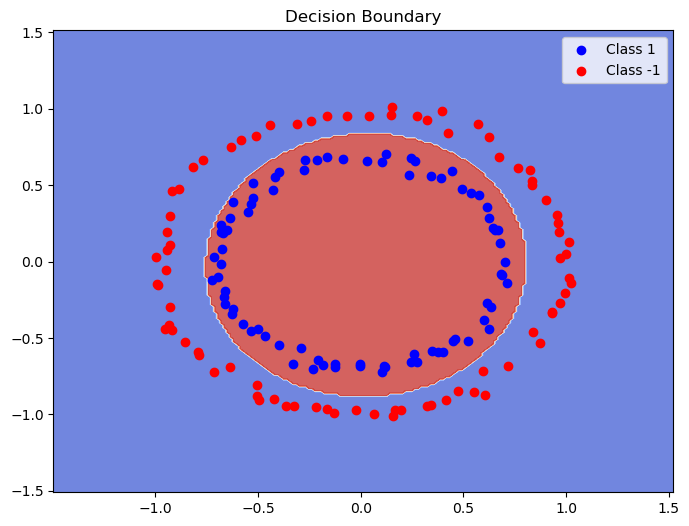

In [60]:
def plot_decision_boundary(X, y, model, poly, ax):
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  # creating a grid of points
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    grid_poly = poly.transform(grid) # transform the grid using polynomial features
    zz = model.predict(grid_poly).reshape(xx.shape)

    ax.contourf(xx, yy, zz, alpha=0.8, cmap=plt.cm.coolwarm) # Plot decision boundary
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    ax.legend()
    ax.set_title("Decision Boundary")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(X_train, y_train, perceptron3, poly,ax)
plt.show()

# def plot_decision_boundary(weights, X, y, ax):
#     ax.clear()
#     ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
#     ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
#     # Decision boundary
#     x_min, x_max = ax.get_xlim()
#     x_vals = np.linspace(x_min, x_max, 100)
#     y_vals = -(weights[0] * x_vals + weights[2]) / weights[1]
#     ax.plot(x_vals, y_vals, color='green', label='Decision Boundary')

#     ax.legend()
#     ax.set_xlim(-3, 3)
#     ax.set_ylim(-3, 3)

# fig, ax = plt.subplots(figsize=(8, 6))
# plot_decision_boundary(perceptron2.history[-1], X_train, y_train, ax)
# plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import imageio
from sklearn.utils import shuffle
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

## funtion for normalizing the features
def normalize_features(X,append=True):
    X = (X - np.mean(X, 0)) / np.std(X, 0) #normalize the features
    if append:
        X = np.append(np.ones(X.shape[0]).reshape(-1,1),X,1) #append column of ones for intercept
    return X


class Perceptron:
    def __init__ (self, X, y, iterations=5):
        # Initialize Perceptron with input features X, target labels y, and the number of iterations
        self.X = X
        self.y = y.reshape(-1,1)  # Reshape target labels for consistency
        self.m, self.n = self.X.shape  # Number of examples (m) and features (n)
        self.i = iterations  # Number of max iterations
    
    def fit(self, lr=0.1, tolerance=1e-3):
        # Initialize random weight vector
        new_W = np.ones(shape=(self.n+1,1))
        # To check if the weight update becomes insignificant
        old_W = new_W.copy()
        # To keep track of how the weight values change over iterations
        w_hist = []
        
        # Iterating through max iterations
        for epoch in range(self.i):
            accuracy = 0
            iter_count = 0
            for ind, x_i in enumerate(self.X):
                # Add bias term to input
                x_i = np.insert(x_i, 0, 1).reshape(-1,1)
                # Apply step activation function to the dot product of input and weights
                y_hat = self.activation(np.dot(x_i.T, new_W)) 
                # Calculate accuracy over the iteration rounds
                accuracy += self.accuracy(self.y[ind], y_hat) 
                # Append iteration count
                iter_count += 1
                # Update weights using the perceptron learning rule
                if (np.squeeze(y_hat) - self.y[ind]) != 0:
                    new_W += lr * ((self.y[ind] - y_hat) / 2 * x_i)

            # Store the history of the weight vector after each epoch
            w_hist.append(old_W)
            
            # Print the results after every 10 epochs
            if epoch % 10 == 0 or epoch == self.i - 1:
                print('Epoch {}/{}'.format(epoch, self.i - 1),':', 'Train Accuracy: {:.4f}'.format(accuracy / iter_count)) 
                 
            # The new weights become old for the next iteration
            old_W = new_W
            
        # Store final weights and history of weights for visualization purposes
        self.W = old_W
        self.hist = w_hist
    
    def activation(self, z):
        # Step activation function: 1 for z > 0, -1 otherwise
        return np.where(z > 0, 1, -1)     
    
    def predict(self, X):
        # Add intercept term to input
        X = np.hstack((np.ones((X.shape[0],1)), X))
        # Calculate predictions using the learned weights
        self.pred = self.activation(np.dot(X, self.W).reshape(1, -1)) 
        return self.pred
    
    def accuracy(self, y_true, y_pred):
        # Calculate accuracy by counting the number of correct predictions
        accuracy = np.sum(y_true == y_pred)
        return accuracy



#Linearly Separable Data

#for loading the data
with open('Xlin_sep.npy','rb') as f:
    X = np.load(f)
with open('ylin_sep.npy','rb') as f:
    y = np.load(f)
    

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#normalize training set
X_train_normalized = normalize_features(X_train, append=False)

#normalizing test set
X_test_normalized = normalize_features(X_test,append=False)

#making the model
p = Perceptron(X_train_normalized, y_train)
#fitting the perceptron
p.fit()

#to get predictions on train and test set
preds_train = p.predict(X_train_normalized)
preds_test = p.predict(X_test_normalized)

print('The accuracy on Train Set is',p.accuracy(y_train,preds_train)/len(y_train))
print('The accuracy on Test Set is',p.accuracy(y_test,preds_test)/len(y_test))


class Visualize:
    
    def __init__(self, X, y, W):
        self.X = X
        self.y = y
        self.W = W
    
    def create_frame(self, w, iteration, name='Linearly Separable'):
    
        if not os.path.exists(name):
            os.mkdir(name)
        markers = ('s', 'o')
        colors = ('red', 'blue')
        cmap = plt.cm.RdBu
        fig, ax = plt.subplots(figsize=(8, 6))
        # Plot the decision surface
        x1_min, x1_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        x2_min, x2_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                               np.arange(x2_min, x2_max, 0.01))
        
        X = np.array([xx1.ravel(), xx2.ravel()]).T
        X = np.hstack((np.ones((X.shape[0],1)), X))
            
        Z = np.dot(X, w).reshape(1, -1)
        Z = np.where(Z > 0, 1, -1)
        Z = Z.reshape(xx1.shape)
        
        ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

        # Plot all samples
        for idx, cl in enumerate(np.unique(y)):
            ax.scatter(x=self.X[self.y == cl, 0], y=self.X[self.y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=f'Class {cl}')


        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title(f'Decision Boundary of {name} at iteration {iteration}')

        ax.legend(loc='upper left')
        plt.savefig(f'./{name}/img_{iteration}.png', 
                        transparent = False,  
                        facecolor = 'white'
                       )
        plt.close()

    def create_animation(self,name):

        for t,w in enumerate(self.W):
            self.create_frame(w,t,name)

        frames = []
        for t in range(len(self.W)):
            image = imageio.v2.imread(f'./{name}/img_{t}.png')
            frames.append(image)

        imageio.mimsave(f'./{name}.gif', frames, fps = 5)


#history of weight vectors
W = p.hist
Visualize(X_train_normalized,y_train,W).create_animation('train_lin_sep_')
Visualize(X_test_normalized,y_test,W).create_animation('test_lin_sep_')



##############3 data with noise

#for loading the data
with open('Xlinnoise_sep.npy','rb') as f:
    X = np.load(f)
with open('ylinnoise_sep.npy','rb') as f:
    y = np.load(f)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

#normalize training set
X_train_normalized = normalize_features(X_train,append=False)

#normalizing test set
X_test_normalized = normalize_features(X_test,append=False)

#making the model
p = Perceptron(X_train_normalized,y_train,iterations=20)
#fitting the perceptron
p.fit()
#to get predictions on train and test set
preds_train = p.predict(X_train_normalized)
preds_test = p.predict(X_test_normalized)

print('The accuracy on Train Set is',p.accuracy(y_train,preds_train)/len(y_train))
print('The accuracy on Test Set is',p.accuracy(y_test,preds_test)/len(y_test))
#history of weight vectors
W = p.hist
Visualize(X_train_normalized,y_train,W).create_animation('train_linnoise_sep_')
Visualize(X_test_normalized,y_test,W).create_animation('test_linnoise_sep_')


## non-linear data
Since the data is not linearly separable, we will add polynomial features into the data. This means instead of giving the perceptron x1 and x2 as input we will now give it  $ x_1^2, x_2^2$

In [ ]:
with open('circles_x.npy','rb') as f:
    X = np.load(f)
with open('circles_y.npy','rb') as f:
    y = np.load(f)


#train test split
X_train, X_test, y_train, y_test = train_test_split(np.square(X), y, test_size=0.25, random_state=42)

#normalize training set
X_train_normalized = normalize_features(X_train,append=False)

#normalizing test set
X_test_normalized = normalize_features(X_test,append=False)

#making the model
p = Perceptron(X_train_normalized,y_train,iterations=20)
#fitting the perceptron
p.fit()

#to get predictions on train and test set
preds_train = p.predict(X_train_normalized)
preds_test = p.predict(X_test_normalized)

print('The accuracy on Train Set is',p.accuracy(y_train,preds_train)/len(y_train))
print('The accuracy on Test Set is',p.accuracy(y_test,preds_test)/len(y_test))

#history of weight vectors
W = p.hist
Visualize(X_train_normalized,y_train,W).create_animation('train_circle_')
Visualize(X_test_normalized,y_test,W).create_animation('test_circle_')

In this part, we will create a feed-forward neural network

- Load the MNIST classification dataset using sklearn. Split the data into train and test datasets (80-20 split).
- Implement a neural network with forward propagation and backpropagation **from scratch**.
- Use Stochastic Gradient Descent as the optimizer and Cross-entropy as Loss.
- You model class should be flexible in terms of
    - Number of layers
    - Number of hidder parameters.
    - Activation function for each layer (SoftMax, ReLU or tanh)
- Now create a training function that takes the neural network and training data as inputs and updates the weights of the network. This function should also take in the learning rate, number of epochs, and batchsize as input.
- Try out different hyperparameters to train your model and try to achieve >90% test accuracy. 

*Hints:*
- Flatten the MNIST data from 2D to 1D.
- Use *He weights initialization* for weights. *The He initialization calculates the starting weights as randomly generated matrices using a Gaussian probability distribution with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the layer.*

In [ ]:
### Write your code here

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Cross-entropy gradient, the gradient of the loss with respect to the output
def cross_entropy_gradient(y_pred, y_true):
    n_samples = y_true.shape[0]
    res = y_pred - y_true
    return res / n_samples

class NeuralNetwork:
    def __init__(self, n_inputs, n_outputs, n_hidden, hidden_dims, activation_funcs):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_hidden = n_hidden  # hidden layers
        self.hidden_dims = hidden_dims  # neurons in each hidden layer

        # list for the number of neurons in each layer
        layers = [self.n_inputs] + self.hidden_dims + [self.n_outputs]
        # weights of each layer
        self.weights = []
        # bias for each layer
        self.biases = []
        # activation func for each layer
        self.activations = []
        # derivatives of the weights
        self.dW = []
        # derivatives of the biases
        self.db = []

        for i in range(self.n_hidden + 1):
            # weights for each layer with "He" initialization
            self.weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(2. / layers[i]))

            # biases for each layer with zeros
            self.biases.append(np.zeros((1, layers[i+1])))

            # activation function for each layer
            self.activations.append(activation_funcs[i])

            # derivatives of the weights and biases with zeros
            self.dW.append(np.zeros((layers[i], layers[i+1])))
            self.db.append(np.zeros((1, layers[i+1])))

    def forward(self, X):
        # weighted sums for each layer
        self.A = []
        # activations for each layer
        self.Z = []

        # For each layer
        for i in range(self.n_hidden + 1):
            # weighted sum of the inputs
            if i == 0:
                self.A.append(np.dot(X, self.weights[i]) + self.biases[i])
            else:
                self.A.append(np.dot(self.Z[i-1], self.weights[i]) + self.biases[i])

            # Apply the activation function
            if self.activations[i] == 'relu':
                self.Z.append(relu(self.A[i]))
            elif self.activations[i] == 'softmax':
                self.Z.append(softmax(self.A[i]))
            elif self.activations[i] == 'tanh':
                self.Z.append(tanh(self.A[i]))

        # output of the last layer
        return self.Z[-1]

    def backward(self, X, y, output):
        # gradient of the loss with respect to the output
        # Note: it's also the gradient for softmax activation layer
        # which is why it's not in the loop below
        self.dZ = cross_entropy_gradient(output, y)

        # gradient of the loss with respect to the weight and bias of the last layer
        self.dW[-1] = np.dot(self.Z[-2].T, self.dZ)
        self.db[-1] = np.sum(self.dZ, axis=0, keepdims=True)

        # For each layer in reverse order
        for i in range(self.n_hidden-1, -1, -1):
            # gradient of the loss with respect to the weighted sum
            if self.activations[i] == 'relu':
                self.dZ = np.dot(self.dZ, self.weights[i+1].T) * relu_derivative(self.A[i])
            elif self.activations[i] == 'tanh':
                self.dZ = np.dot(self.dZ, self.weights[i+1].T) * tanh_derivative(self.A[i])

            # gradient of the loss with respect to the weights and biases
            if i > 0:
                self.dW[i-1] = np.dot(self.Z[i-1].T, self.dZ)
            else:
                self.dW[i] = np.dot(X.T, self.dZ)
            self.db[i] = np.sum(self.dZ, axis=0, keepdims=True)

    def train(self, X, y, n_epochs, learning_rate, batch_size):
        # num of batches based on batch size
        n_batches = X.shape[0] // batch_size

        for epoch in range(n_epochs):
            # for each batch
            for batch in range(n_batches):
                # batch from data
                X_batch = X[batch * batch_size:(batch + 1) * batch_size]
                y_batch = y[batch * batch_size:(batch + 1) * batch_size]

                # Forward propagation to get output layer
                output = self.forward(X_batch)

                # Backward propagation to get gradients of the loss function
                self.backward(X_batch, y_batch, output)

                # Update weights and biases using gradients and learning rate
                for i in range(self.n_hidden + 1):
                    self.weights[i] -= learning_rate * self.dW[i]
                    self.biases[i] -= learning_rate * self.db[i]

            # Print loss and accuracy every 10 epochs
            if epoch % 10 == 0:
                predictions = self.predict(X)
                loss = self.calculate_loss(predictions, y)
                accuracy = self.calculate_accuracy(predictions, y)
                print(f"Epoch {epoch}: Loss = {loss}, Accuracy = {accuracy}")

    def calculate_loss(self, predictions, y):
        # If y is not one-hot encoded, convert it to one-hot encoding
        if len(y.shape) == 1:
            y_one_hot = np.zeros_like(predictions)
            y_one_hot[np.arange(len(y)), y] = 1
        else:
            y_one_hot = y

        # Cross-entropy loss
        epsilon = 1e-15
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        loss = -np.sum(y_one_hot * np.log(predictions)) / len(y)
        return loss


    def calculate_accuracy(self, predictions, y):
        # If y is not one-hot encoded, convert it to one-hot encoding
        if len(y.shape) == 1:
            y_one_hot = np.zeros_like(predictions)
            y_one_hot[np.arange(len(y)), y] = 1
        else:
            y_one_hot = y

        # Accuracy calculation
        correct_predictions = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_one_hot, axis=1))
        accuracy = correct_predictions / len(y)
        return accuracy
    
    def predict(self, X):
        output = self.forward(X)
        return output


# MNIST dataset mini version, data already flatterned
digits = load_digits()
#to separate in the features and labels
X = digits['data']
y = digits['target']
#scalar for scaling the features aka pixels
scalar = StandardScaler()
X = scalar.fit_transform(X) 
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train valid split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# One-hot encode the labels, 10 posible lables (0 to 9)
one_hot = OneHotEncoder(sparse_output=False)
y = one_hot.fit_transform(np.array(y).reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2 layers to capture complex data relu is most popular layer in all nn's and softmax for classification
nn = NeuralNetwork(n_inputs=64, n_outputs=10, n_hidden=2, hidden_dims=[32, 32], activation_funcs=['relu', 'relu', 'softmax'])
nn.train(X_train, y_train, n_epochs=50, learning_rate=0.01, batch_size=32)

# test accuracy
y_pred = np.argmax(nn.predict(X_test), axis=1)

# convert encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)
# mean of the comparison between predicted and true labels
test_accuracy = np.mean(y_test_labels  == y_pred)
print(f'Test accuracy: {test_accuracy:.2%}')



**MLPClassifier**

In this part, we will use the same dataset from Part 2 and implement a multi-layer perceptron using sklearn. 
- Import the necessary classes and perform a 5-fold cross-validation by defining a hyperparameter grid for the MLP classifier. 
- You need to read about the hyperparameters supported by the function and define a grid for them.
- Perform a random search on the grid that you have chosen.
- Report a single test accuracy with the best found hyperparameters

**Note: you can use any sklearn function for this and the next part**

In [ ]:
### Write your code here
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

sklearn_mlp = MLPClassifier(max_iter=500)

#Creating Grid
grid = {
    'hidden_layer_sizes': [(50,30,20),(50,25,10),(25,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd'],
    'alpha': [0.001, 0.001, 0.01, 0.1],
}

#fit the grid
clf = RandomizedSearchCV(sklearn_mlp, grid, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

clf.best_params_
print('The Accuracy on Test Data is',accuracy_score(y_test,clf.predict(X_test)))


**MLPRegressor**

In this part, we would repeat the all steps taken for MLPClassifier. However, we will try to learn a regression model using MLPRegressor instead. In the end calculate the accuracy of MLPRegressor by using the *test_accuracy_regressor* function provided.

**Note: The target output needs to be numerical in this case.**

In [ ]:
### Write your code here
from sklearn.neural_network import MLPRegressor
sklearn_mlp = MLPRegressor(max_iter=500)

#Creating Grid
grid = {
    'hidden_layer_sizes': [(50,30,20),(50,25,10),(25,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd'],
    'alpha': [0.001, 0.001, 0.01, 0.1
             ],
}

#fit the grid
reg = RandomizedSearchCV(sklearn_mlp, grid, n_jobs=-1, cv=5)
reg.fit(X_train, np.argmax(y_train, axis=1))

reg.best_params_

def test_accuracy_regressor(y_true,y_pred):
    ### the function assumes both inputs to be 1-D arrays
    assert y_true.shape==y_pred.shape, f"y_true and y_pred needs to be of same shape, but found y_true: {y_true.shape} and y_pred:{y_pred.shape}"
    assert len(y_pred.shape)==1, f'inputs should be 1-D, but found them as {len(y_pred.shape)}-D'

    return np.sum((np.round(y_pred,0).astype(int))==y_true)/y_pred.size

test_acc = test_accuracy_regressor(np.argmax(y_test, axis=1),reg.predict(X_test))
print('The Accuracy on Test Data is',test_acc)

In [46]:
# from sklearn.linear_model import Perceptron

# perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
# perceptron.fit(X_train_poly, y_train)

# # Evaluate the perceptron
# y_train_pred = perceptron.predict(X_train_poly)
# y_test_pred = perceptron.predict(X_test_poly)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"Train Accuracy: {train_accuracy:.2f}")
# print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 1.00


### 2) Classification via Neural Networks

The task for this exercise is to develop a Neural Network model that can classify human-written digits (0
through 9). We will reuse concepts from previous exercises such as hyperparameter optimization and k-fold
cross-validatio P

In [19]:
digits = load_digits()
X, y = digits.data, digits.target
#X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'max_iter': [200, 300, 500]
}

In [20]:
mlp = MLPClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_grid,
    n_iter=10,  # no. of random combinations to try
    cv=kf,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_full, y_train_full)

best_model = random_search.best_estimator_  # evaluating the best model on the hold-out test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", random_search.best_params_)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Best Hyperparameters: {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Test Set Accuracy: 0.98


In [ ]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size)

'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)
'''

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch: 10, loss = 4099.4702
epoch: 20, loss = 2887.1477
epoch: 30, loss = 2061.0249
epoch: 40, loss = 1497.9485
epoch: 50, loss = 1114.0789
epoch: 60, loss = 852.3258
epoch: 70, loss = 673.8044
epoch: 80, loss = 552.0238
epoch: 90, loss = 468.9333
epoch: 100, loss = 412.2299


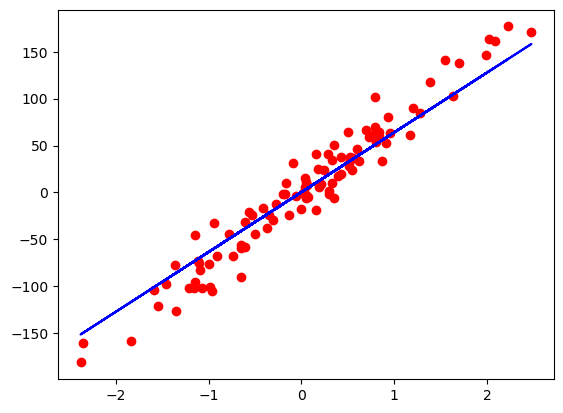

In [1]:
###### linear regression pytorch

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


In [6]:
####### logistic regre

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6883
epoch: 20, loss = 0.5486
epoch: 30, loss = 0.4637
epoch: 40, loss = 0.4068
epoch: 50, loss = 0.3659
epoch: 60, loss = 0.3350
epoch: 70, loss = 0.3106
epoch: 80, loss = 0.2908
epoch: 90, loss = 0.2743
epoch: 100, loss = 0.2604
accuracy: 0.8684


In [ ]:
##### soft max

import torch
import torch.nn as nn
import numpy as np

#
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability
# sum of all probabilities is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')









# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])







# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')






# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)




In [ ]:
######## activation functions

# output = w*x + b
# output = activation_function(output)
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out


import numpy as np 
import matplotlib.pyplot as plt

##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()

##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()

##### ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

fig = plt.figure()

##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()


##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('step.png')

print('done')



In [ ]:
####### feed forward 

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')



In [ ]:
##### sebastain logistic regre

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F
data = np.genfromtxt('data/toydata.txt', delimiter='\t')
x = data[:, :2].astype(np.float32)
y = data[:, 2].astype(np.int64)

np.random.seed(123)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
X_test, y_test = x[idx[:25]], y[idx[:25]]
X_train, y_train = x[idx[25:]], y[idx[25:]]
mu, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train, X_test = (X_train - mu) / std, (X_test - mu) / std

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1])
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1])
plt.xlim([x[:, 0].min()-0.5, x[:, 0].max()+0.5])
plt.ylim([x[:, 1].min()-0.5, x[:, 1].max()+0.5])
plt.show()

### Low-level implementation with manual gradients


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class LogisticRegression1():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(1, num_features, 
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights.t()), self.bias).view(-1) # net input
        probas = self._sigmoid(linear)
        return probas
        
    def backward(self, x, y, probas):  
        grad_loss_wrt_z = probas.view(-1) - y
        grad_loss_wrt_w = torch.mm(x.t(), grad_loss_wrt_z.view(-1, 1)).t()
        grad_loss_wrt_b = torch.sum(grad_loss_wrt_z)
        return grad_loss_wrt_w, grad_loss_wrt_b
            
    def predict_labels(self, x):
        probas = self.forward(x)
        labels = torch.where(probas >= .5, 1, 0) # threshold function
        return labels    
            
    def evaluate(self, x, y):
        labels = self.predict_labels(x).float()
        accuracy = torch.sum(labels.view(-1) == y.float()).item() / y.size(0)
        return accuracy
    
    def _sigmoid(self, z):
        return 1. / (1. + torch.exp(-z))
    
    def _logit_cost(self, y, proba):
        tmp1 = torch.mm(-y.view(1, -1), torch.log(proba.view(-1, 1)))
        tmp2 = torch.mm((1 - y).view(1, -1), torch.log(1 - proba.view(-1, 1)))
        return tmp1 - tmp2
    
    def train(self, x, y, num_epochs, learning_rate=0.01):
        epoch_cost = []
        for e in range(num_epochs):
            
            #### Compute outputs ####
            probas = self.forward(x)
            
            #### Compute gradients ####
            grad_w, grad_b = self.backward(x, y, probas)

            #### Update weights ####
            self.weights -= learning_rate * grad_w
            self.bias -= learning_rate * grad_b
            
            #### Logging ####
            cost = self._logit_cost(y, self.forward(x)) / x.size(0)
            print('Epoch: %03d' % (e+1), end="")
            print(' | Train ACC: %.3f' % self.evaluate(x, y), end="")
            print(' | Cost: %.3f' % cost)
            epoch_cost.append(cost)
        return epoch_cost



X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

model1 = LogisticRegression1(num_features=2)
epoch_cost = model1.train(X_train_tensor, y_train_tensor, num_epochs=30, learning_rate=0.1)

print('\nModel parameters:')
print('  Weights: %s' % model1.weights)
print('  Bias: %s' % model1.bias)

#Evaluating the Model
plt.plot(epoch_cost)
plt.ylabel('Neg. Log Likelihood Loss')
plt.xlabel('Epoch')
plt.show()


X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = model1.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))


##########################
### 2D Decision Boundary
##########################

w, b = model1.weights.view(-1), model1.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()









################ High-level implementation using the nn.Module API

class LogisticRegression2(torch.nn.Module):

    def __init__(self, num_features):
        super(LogisticRegression2, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)
        # initialize weights to zeros here,
        # since we used zero weights in the
        # manual approach
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        # Note: the trailing underscore
        # means "in-place operation" in the context
        # of PyTorch
        
    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

model2 = LogisticRegression2(num_features=2).to(device)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)


def comp_accuracy(label_var, pred_probas):
    pred_labels = torch.where((pred_probas > 0.5), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc


num_epochs = 30

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)


for epoch in range(num_epochs):
    
    #### Compute outputs ####
    out = model2(X_train_tensor)
    
    #### Compute gradients ####
    loss = F.binary_cross_entropy(out, y_train_tensor, reduction='sum')
    optimizer.zero_grad()
    loss.backward()
    
    #### Update weights ####  
    optimizer.step()
    
    #### Logging ####      
    pred_probas = model2(X_train_tensor)
    acc = comp_accuracy(y_train_tensor, pred_probas)
    print('Epoch: %03d' % (epoch + 1), end="")
    print(' | Train ACC: %.3f' % acc, end="")
    print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_train_tensor))


    
print('\nModel parameters:')
print('  Weights: %s' % model2.linear.weight)
print('  Bias: %s' % model2.linear.bias)

#### Evaluating the Model
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

pred_probas = model2(X_test_tensor)
test_acc = comp_accuracy(y_test_tensor, pred_probas)

print('Test set accuracy: %.2f%%' % (test_acc*100))


##########################
### 2D Decision Boundary
##########################

w, b = model2.linear.weight.detach().view(-1), model2.linear.bias.detach()

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))
ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()




In [ ]:
######## softmax regression scratch
import torch
import torch.nn.functional as F

df = pd.read_csv('./data/iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']

d = {'Iris-versicolor': 1,
     'Iris-virginica': 2,
     'Iris-setosa': 0,
}

df['y'] = df['y'].map(d)

# Assign features and target

X = torch.tensor(df[['x2', 'x4']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent80 = int(shuffle_idx.size(0)*0.8)

X_train, X_test = X[shuffle_idx[:percent80]], X[shuffle_idx[percent80:]]
y_train, y_test = y[shuffle_idx[:percent80]], y[shuffle_idx[percent80:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma


fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1])
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='v')
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='s')
ax[1].scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='v')
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], marker='s')
plt.show()


#### Low-level implementation with manual gradients
def to_onehot(y, num_classes):
    y_onehot = torch.FloatTensor(y.size(0), num_classes)
    y_onehot.zero_()
    y_cpu = y.to(torch.device('cpu'))
    y_onehot.scatter_(1, y_cpu.view(-1, 1).long(), 1).float()
    return y_onehot.to(DEVICE)

def softmax(z):
    return (torch.exp(z.t()) / torch.sum(torch.exp(z), dim=1)).t()
                    
def cross_entropy(softmax, y_target):
    return -torch.sum(torch.log(softmax) * (y_target), dim=1)

class SoftmaxRegression1():
    def __init__(self, num_features, num_classes):
        self.num_features = num_features
        self.num_classes = num_classes
        self.weights = torch.zeros(num_classes, num_features, # h x m
                                   dtype=torch.float32, device=DEVICE)
        self.bias = torch.zeros(num_classes, dtype=torch.float32, device=DEVICE) # h

    def forward(self, x):
        logits = torch.mm(x, self.weights.t()) + self.bias # net inputs
        probas = softmax(logits) # activations
        return logits, probas
        
    def backward(self, x, y, probas):  
        grad_loss_wrt_w = -torch.mm(x.t(), y - probas).t()
        grad_loss_wrt_b = -torch.sum(y - probas)
        return grad_loss_wrt_w, grad_loss_wrt_b
            
    def predict_labels(self, x):
        logits, probas = self.forward(x)
        labels = torch.argmax(probas, dim=1)
        return labels    
            
    def evaluate(self, x, y):
        labels = self.predict_labels(x).float()
        accuracy = torch.sum(labels.view(-1) == y.float()).item() / y.size(0)
        return accuracy
    
    def train(self, x, y, num_epochs, learning_rate=0.01):
        epoch_cost = []
        for e in range(num_epochs):
            
            y_onehot = to_onehot(y, num_classes=self.num_classes)
            #### Compute outputs ####
            logits, probas = self.forward(x)
            
            #### Compute gradients ####
            grad_w, grad_b = self.backward(x, y_onehot, probas)

            #### Update weights ####
            self.weights -= learning_rate * grad_w / y.size(0)
            self.bias -= learning_rate * grad_b / y.size(0)
            
            #### Logging ####
            logits, probas = self.forward(x)
            cost = torch.mean(cross_entropy(probas, y_onehot))
            print('Epoch: %03d' % (e+1), end="")
            print(' | Train ACC: %.3f' % self.evaluate(x, y), end="")
            print(' | Cost: %.3f' % cost)
            epoch_cost.append(cost)
        return epoch_cost

X_train = X_train.to(DEVICE)
y_train = y_train.to(DEVICE)

model1 = SoftmaxRegression1(num_features=2, num_classes=3)
epoch_cost = model1.train(X_train, y_train, 
                          num_epochs=50,
                          learning_rate=0.1)

print('\nModel parameters:')
print('  Weights: %s' % model1.weights)
print('  Bias: %s' % model1.bias)


plt.plot(epoch_cost)
plt.ylabel('Negative Log Likelihood Loss')
plt.xlabel('Epoch')
plt.show()

X_test = X_test.to(DEVICE)
y_test = y_test.to(DEVICE)

test_acc = model1.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))



from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)



plot_decision_regions(X_train, y_train, classifier=model1)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()





################ High-level implementation using the nn.Module API





class SoftmaxRegression2(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression2, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)
        # initialize weights to zeros here,
        # since we used zero weights in the
        # manual approach
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        # Note: the trailing underscore
        # means "in-place operation" in the context
        # of PyTorch
        
    def forward(self, x):
        logits = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

model2 = SoftmaxRegression2(num_features=2, num_classes=3).to(DEVICE)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)



def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy



X_train = X_train.to(DEVICE)
y_train = y_train.to(DEVICE)
X_test = X_test.to(DEVICE)
y_test = y_test.to(DEVICE)

num_epochs = 50
for epoch in range(num_epochs):
    
    #### Compute outputs ####
    logits, probas = model2(X_train)
    
    #### Compute gradients ####
    cost = F.cross_entropy(logits, y_train.long())
    optimizer.zero_grad()
    cost.backward()
    
    #### Update weights ####  
    optimizer.step()
    
    #### Logging ####      
    logits, probas = model2(X_train)
    acc = comp_accuracy(y_train, torch.argmax(probas, dim=1))
    print('Epoch: %03d' % (epoch + 1), end="")
    print(' | Train ACC: %.3f' % acc, end="")
    print(' | Cost: %.3f' % F.cross_entropy(logits, y_train.long()))



print('\nModel parameters:')
print('  Weights: %s' % model2.linear.weight)
print('  Bias: %s' % model2.linear.bias)

X_test = X_test.to(DEVICE)
y_test = y_test.to(DEVICE)

test_acc = model1.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))


plot_decision_regions(X_train, y_train, classifier=model2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()




In [ ]:
########## Softmax Regression on MNIST


import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
random_seed = 123
learning_rate = 0.1
num_epochs = 25
batch_size = 256

# Architecture
num_features = 784
num_classes = 10


##########################
### MNIST DATASET
##########################

train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())



train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)


# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape) #NCHW
    print('Image label dimensions:', labels.shape)
    break


##########################
### MODEL
##########################

class SoftmaxRegression(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        
    def forward(self, x):
        logits = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

model = SoftmaxRegression(num_features=num_features,
                          num_classes=num_classes)

model.to(device)

##########################
### COST AND OPTIMIZER
##########################

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Manual seed for deterministic data loader
torch.manual_seed(random_seed)


def compute_accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    
    for features, targets in data_loader:
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)
        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
        
    return correct_pred.float() / num_examples * 100



start_time = time.time()
epoch_costs = []
for epoch in range(num_epochs):
    avg_cost = 0.
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        
        # note that the PyTorch implementation of
        # CrossEntropyLoss works with logits, not
        # probabilities
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        cost.backward()
        avg_cost += cost
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_dataset)//batch_size, cost))
            
    
    with torch.set_grad_enabled(False):
        avg_cost = avg_cost/len(train_dataset)
        epoch_costs.append(avg_cost)
        print('Epoch: %03d/%03d training accuracy: %.2f%%' % (
              epoch+1, num_epochs, 
              compute_accuracy(model, train_loader)))
        print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


plt.plot(epoch_costs)
plt.ylabel('Avg Cross Entropy Loss\n(approximated by averaging over minibatches)')
plt.xlabel('Epoch')
plt.show()

print('Test accuracy: %.2f%%' % (compute_accuracy(model, test_loader)))

for features, targets in test_loader:
    break
    
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(features[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

_, predictions = model.forward(features[:4].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions)


In [7]:
######### XOR problem
import torch
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED = 123
DEVICE = ('cuda:0' if torch.cuda.is_available() else 'cpu')

df = pd.read_csv('xor.csv')
X = df[['x1', 'x2']].values
y = df['class label'].values


plt.scatter(X[y==0, 0], X[y==0, 1], marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='s')

plt.tight_layout()
#plt.savefig('xor.pdf')
plt.show()



SyntaxError: invalid syntax (2302241165.py, line 24)